In [1]:
pip install pandas torch torchvision scikit-learn nltk transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 209.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 222.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 213.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 203.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 210.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 178.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 216.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 234.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 226.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 291.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 221.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 M

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Preprocessing

### Check Image Sizes

In [3]:
import os
from PIL import Image

def check_image_sizes(image_folder):
    # List all image files in the directory
    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

    for file_name in image_files:
        file_path = os.path.join(image_folder, file_name)
        try:
            with Image.open(file_path) as img:
                width, height = img.size
                print(f"Image: {file_name}, Size: {width} x {height}")
        except Exception as e:
            print(f"Error processing image '{file_name}': {e}")

image_folder = 'Images/'
check_image_sizes(image_folder)


Image: HSVyqdL.png, Size: 486 x 464
Image: GYmNXOy.png, Size: 640 x 637
Image: 8mROrGY.png, Size: 562 x 607
Image: iZR0Ych.png, Size: 610 x 467
Image: FrLLfI8.png, Size: 640 x 640
Image: nNYop46.png, Size: 1000 x 1000
Image: WcXzDk2.png, Size: 560 x 375
Image: cAm7azy.png, Size: 400 x 467
Image: NdIEduW.png, Size: 1440 x 2560
Image: uTJaugb.png, Size: 940 x 466
Image: b3N3bmV.png, Size: 750 x 539
Image: 6uTXEgh.png, Size: 314 x 394
Image: MLw5fUA.png, Size: 960 x 364
Image: 9kZb6UD.png, Size: 730 x 390
Image: TFRcH6Q.png, Size: 1358 x 58
Image: aXJH7EU.png, Size: 1024 x 682
Image: CWxcn8cWcAEOWqO.jpg, Size: 521 x 295
Image: ewKXYvk.png, Size: 597 x 580
Image: JHF6hFI.png, Size: 500 x 446
Image: qHkGmLt.png, Size: 1080 x 1215
Image: hV8hDZV.png, Size: 750 x 1334
Image: DB1R0kO.png, Size: 395 x 395
Image: ugTPNMd.png, Size: 539 x 960
Image: 5NWPOQp.png, Size: 609 x 461
Image: uluP5WP.png, Size: 595 x 422
Image: CVf4HDmWcAE_Q4m.png, Size: 883 x 545
Image: gSIuTfF.png, Size: 960 x 960
Imag

In [4]:
import os
from PIL import Image
from torchvision.transforms.functional import resize
from torchvision import transforms

# Define a function to resize images while maintaining aspect ratio
def resize_with_aspect_ratio(image, desired_size):
    old_width, old_height = image.size
    aspect_ratio = old_width / old_height

    # Calculate new size while maintaining aspect ratio
    if old_width >= old_height:
        new_width = desired_size
        new_height = int(new_width / aspect_ratio)
    else:
        new_height = desired_size
        new_width = int(new_height * aspect_ratio)

    return image.resize((new_width, new_height), Image.LANCZOS)

# Define transformations for images
image_transform = transforms.Compose([
    transforms.Lambda(lambda img: resize_with_aspect_ratio(img, 256)),  # Resize while maintaining aspect ratio
    transforms.CenterCrop(224),  # Center crop to 224x224
])

def apply_transforms_to_images(image_folder):
    transformed_images = []
    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

    # Create a dictionary to map image file names to transformed images
    image_mapping = {}

    for file_name in image_files:
        file_path = os.path.join(image_folder, file_name)
        try:
            with Image.open(file_path) as img:
                transformed_image = image_transform(img)
                transformed_images.append(transformed_image)
                # Map image file name to transformed image
                image_mapping[file_name] = transformed_image
        except Exception as e:
            print(f"Error processing image '{file_name}': {e}")

    return transformed_images, image_mapping

# Usage example:
image_folder = 'Images/'
transformed_images, image_mapping = apply_transforms_to_images(image_folder)

# Check image sizes
for img in transformed_images:
    width, height = img.size
    print(f"Image: Size: {width} x {height}")

# Verify image mapping
print("\nImage mapping:")
for image_name, transformed_image in image_mapping.items():
    print(f"Image Name: {image_name}, Transformed Image: {transformed_image.size}")


Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size

In [5]:
import pandas as pd

# Load train, test, and validation CSV files
train_df = pd.read_csv("Dataset/Training_meme_dataset.csv")
test_df = pd.read_csv("Dataset/Testing_meme_dataset.csv")
val_df = pd.read_csv("Dataset/Validation_meme_dataset.csv")

# Check for missing values
print("Missing values in train dataset:")
print(train_df.isnull().sum())
print("\nMissing values in test dataset:")
print(test_df.isnull().sum())
print("\nMissing values in validation dataset:")
print(val_df.isnull().sum())

# Verify label distribution
print("\nLabel distribution in train dataset:")
print(train_df['label'].value_counts())
print("\nLabel distribution in test dataset:")
print(test_df['label'].value_counts())
print("\nLabel distribution in validation dataset:")
print(val_df['label'].value_counts())

# Verify image and text correspondence (optional)
# Visualize sample data (optional)


Missing values in train dataset:
image_name    0
sentence      0
label         0
dtype: int64

Missing values in test dataset:
image_name    0
sentence      0
label         0
dtype: int64

Missing values in validation dataset:
image_name    0
sentence      0
label         0
dtype: int64

Label distribution in train dataset:
label
Non-offensiv    258
offensive       187
Name: count, dtype: int64

Label distribution in test dataset:
label
Non-offensiv    91
offensive       58
Name: count, dtype: int64

Label distribution in validation dataset:
label
Non-offensiv    91
offensive       58
Name: count, dtype: int64


/tmp/ipykernel_224/1002635492.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Lemmatize tokens and remove stopwords and punctuation
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english') and token not in string.punctuation]
    # Join tokens back into a sentence
    text = ' '.join(tokens)
    return text

# Print original sentences
print("Original sentences:")
print(train_df['sentence'].head())

# Apply text preprocessing to the 'sentence' column
train_df['sentence'] = train_df['sentence'].apply(preprocess_text)
test_df['sentence'] = test_df['sentence'].apply(preprocess_text)
val_df['sentence'] = val_df['sentence'].apply(preprocess_text)

# Print tokenized sentences
print("\nTokenized sentences:")
print(train_df['sentence'].head())


Original sentences:
0    OFFICIAL BERNIE SANDERS DRINKING GAME ! Every ...
1    2:28 PM THIS IS A WALL INSIDE A NAZI GAS CHAMB...
2                  o shit waddup ! BERNIE SANDERS COM 
3    `` MITT ROMNEY IS THE WORST REPUBLICAN IN THE ...
4    Anonymous ( ID : duqdA1io a 08/05/16 ( Fri ) 1...
Name: sentence, dtype: object

Tokenized sentences:
0    official bernie sander drinking game every tim...
1    2:28 pm wall inside nazi gas chamber dwebs dem...
2                        shit waddup bernie sander com
3    `` mitt romney worst republican country putup ...
4    anonymous id duqda1io 08/05/16 fri 16:32:48 84...
Name: sentence, dtype: object


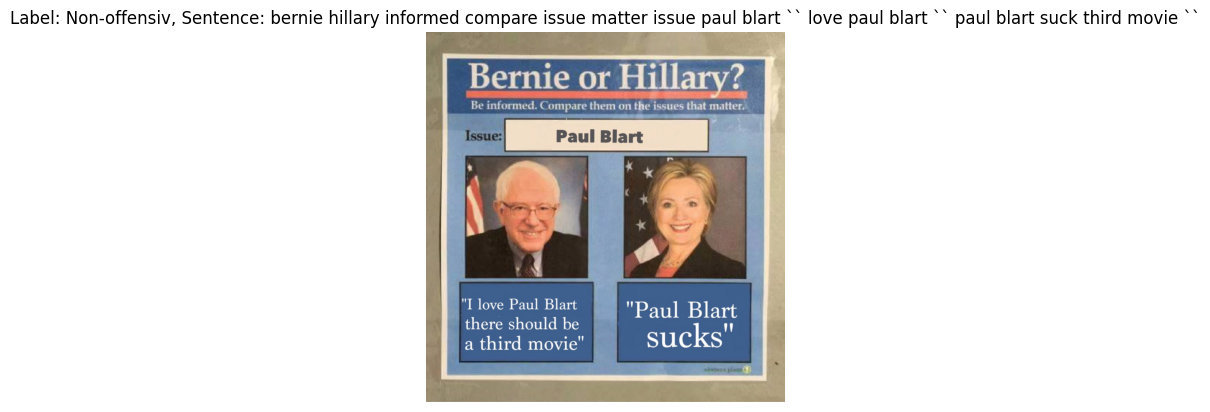

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

# Visualize sample data (optional)
sample_data = train_df.sample(n=1)  # Select a random row from the dataset
image_name = sample_data['image_name'].values[0]
sentence = sample_data['sentence'].values[0]
label = sample_data['label'].values[0]

# Load and display the image
image_path = os.path.join("Images/", image_name)
image = Image.open(image_path)
plt.imshow(image)
plt.title(f"Label: {label}, Sentence: {sentence}")
plt.axis('off')
plt.show()

In [8]:
from transformers import CLIPProcessor, CLIPModel

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

2024-04-29 08:48:18.522546: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 08:48:18.522651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 08:48:18.525414: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-29 08:48:18.537690: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 08:48:21.942655: W tensorflow/compiler/tf2

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [9]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import pandas as pd
from torch.nn.utils.rnn import pad_sequence

# Define a mapping from string labels to integers
label_mapping = {
    'offensive': 0,
    'Non-offensiv': 1
}

# Replace string labels with numerical labels
train_df['label'] = train_df['label'].map(label_mapping)
test_df['label'] = test_df['label'].map(label_mapping)
val_df['label'] = val_df['label'].map(label_mapping)


In [10]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms.functional import resize
from torchvision import transforms
from PIL import Image
import pandas as pd
from torch.nn.utils.rnn import pad_sequence

# Custom Dataset Class
class MemeDataset(Dataset):
    """Custom Dataset for loading meme data, using pre-transformed images."""
    def __init__(self, df, processor, image_mapping):
        self.df = df
        self.processor = processor
        self.image_mapping = image_mapping  # This dictionary maps image filenames to pre-transformed images.

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        text = row['sentence']
        image_file_name = row['image_name']
        transformed_image = self.image_mapping[image_file_name]  # Fetch the pre-transformed image from the dictionary.

        # Use processor to prepare the inputs; handling images in memory.
        inputs = self.processor(text=text, images=transformed_image, return_tensors="pt", padding=True, truncation=True)
        
        # Use the numerical label directly
        label = row['label']

        return {
            'input_ids': inputs.input_ids.squeeze(0),
            'attention_mask': inputs.attention_mask.squeeze(0),
            'pixel_values': inputs.pixel_values.squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def collate_fn(batch):
    # Unzip the batch and extract all components
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = torch.stack([item['labels'] for item in batch])
    
    # Pad the sequences - ensure all tensors are padded to the same length in the batch
    input_ids_padded = pad_sequence(input_ids, batch_first=True, padding_value=0)
    attention_mask_padded = pad_sequence(attention_mask, batch_first=True, padding_value=0)
    
    return input_ids_padded, attention_mask_padded, pixel_values, labels

# Instantiate datasets
train_dataset = MemeDataset(train_df, processor, image_mapping)
val_dataset = MemeDataset(val_df, processor, image_mapping)
test_dataset = MemeDataset(test_df, processor, image_mapping)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)


In [11]:
import torch
import torch.nn as nn

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1):
        super(BinaryClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        x = self.fc(x)
        return torch.sigmoid(x)  # Output probability for the positive class


In [12]:
class CLIPBinaryModel(nn.Module):
    def __init__(self, clip_model, feature_dim=1024):  # Adjusted feature dimension
        super(CLIPBinaryModel, self).__init__()
        self.clip_model = clip_model
        self.binary_classifier = BinaryClassifier(input_dim=feature_dim)
    
    def forward(self, input_ids, attention_mask, pixel_values):
        self.clip_model.eval()  # Ensure the CLIP model is in eval mode
        with torch.no_grad():
            outputs = self.clip_model(input_ids=input_ids, attention_mask=attention_mask, pixel_values=pixel_values)
        
        # Assume we use the mean pooled features from the text and image for binary classification
        image_features = outputs.image_embeds  # Adjust according to how you want to use CLIP outputs
        text_features = outputs.text_embeds    # Adjust accordingly
        
        # Concatenate or use either feature set depending on your specific application
        features = torch.cat((image_features, text_features), dim=1)
        
        # Forward through the binary classifier
        logits = self.binary_classifier(features)
        return logits

# Initialize the CLIP model and wrap it with your binary classifier
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_binary_model = CLIPBinaryModel(clip_model)


In [20]:
from torch.optim import Adam
from tqdm.auto import tqdm  # For nice progress bars
from torch.nn.functional import cross_entropy
import torch.optim as optim
from torch.nn import BCELoss
from torch.optim import AdamW
from torch import nn

# Assuming you have defined 'train_loader' and 'device'
optimizer = optim.Adam(clip_binary_model.parameters(), lr=5e-6)
criterion = BCELoss()  # Binary cross-entropy loss

def train_one_epoch(model, data_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids, attention_mask, pixel_values, labels = batch
        labels = labels.unsqueeze(1).float()  # Ensure labels are correctly shaped and typed
        
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        pixel_values = pixel_values.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logits = model(input_ids, attention_mask, pixel_values)
        loss = criterion(logits, labels)  # Compute loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(data_loader)

def validate(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            input_ids, attention_mask, pixel_values, labels = batch
            labels = labels.unsqueeze(1).float()
            
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            pixel_values = pixel_values.to(device)
            labels = labels.to(device)

            logits = model(input_ids, attention_mask, pixel_values)
            loss = criterion(logits, labels)
            total_loss += loss.item()
    return total_loss / len(data_loader)


In [22]:
# Assuming you have instantiated your model and it's named `clip_binary_model`
clip_binary_model = CLIPBinaryModel(clip_model)  # Ensure this is correctly initialized
clip_binary_model.to(device)  # Move your model to the appropriate device (GPU or CPU)

# Number of epochs
num_epochs = 10  # Adjust based on your specific needs and dataset size

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    # Ensure to pass the correct model and criterion to the training function
    train_loss = train_one_epoch(clip_binary_model, train_loader, optimizer, criterion, device)
    
    # Pass the correct model and criterion to the validation function
    val_loss = validate(clip_binary_model, val_loader, criterion, device)
    
    print(f"Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


Epoch 1/10
Training Loss: 0.6898, Validation Loss: 0.6888
Epoch 2/10
Training Loss: 0.6898, Validation Loss: 0.6888
Epoch 3/10
Training Loss: 0.6898, Validation Loss: 0.6888
Epoch 4/10
Training Loss: 0.6898, Validation Loss: 0.6888
Epoch 5/10
Training Loss: 0.6898, Validation Loss: 0.6888
Epoch 6/10
Training Loss: 0.6899, Validation Loss: 0.6888
Epoch 7/10
Training Loss: 0.6899, Validation Loss: 0.6888
Epoch 8/10
Training Loss: 0.6898, Validation Loss: 0.6888
Epoch 9/10
Training Loss: 0.6899, Validation Loss: 0.6888
Epoch 10/10
Training Loss: 0.6898, Validation Loss: 0.6888


In [25]:
import torch

def test_model(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    actual_labels = []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids, attention_mask, pixel_values, labels = batch
            
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            pixel_values = pixel_values.to(device)
            labels = labels.to(device)
            
            logits = model(input_ids, attention_mask, pixel_values)
            predicted_labels = (logits > 0.5).int()  # Apply threshold to convert probabilities to binary labels
            
            predictions.extend(predicted_labels.cpu().numpy())
            actual_labels.extend(labels.cpu().numpy())
    
    return predictions, actual_labels


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(preds, labels):
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds)
    recall = recall_score(labels, preds)
    f1 = f1_score(labels, preds)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Assuming your model, test_loader, and device are already defined and initialized
predictions, actual_labels = test_model(clip_binary_model, test_loader, device)
calculate_metrics(predictions, actual_labels)


Accuracy: 0.6040
Precision: 0.6081
Recall: 0.9890
F1 Score: 0.7531


In [30]:
torch.save(clip_binary_model, './clip_binary_model.pth')


In [32]:
from PIL import Image
import torch
from torchvision import transforms

# Define a function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    # Apply the same transformations as used during training
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
    image_tensor = transform(image)
    return image_tensor

# Define a function to preprocess the text
def preprocess_text(text, processor):
    # Process text using the CLIP processor
    inputs = processor(text=text, return_tensors="pt", padding=True, truncation=True)
    return inputs['input_ids'], inputs['attention_mask']

# Function to make a prediction
def predict(image_path, text, model, processor, device):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Preprocess image and text
        image_tensor = preprocess_image(image_path).unsqueeze(0).to(device)
        input_ids, attention_mask = preprocess_text(text, processor)

        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        # Forward pass
        logits = model(input_ids, attention_mask, pixel_values=image_tensor)
        prediction = torch.sigmoid(logits)  # Get the probability score
        predicted_label = (prediction > 0.5).int()  # Convert to binary output

    return prediction.item(), predicted_label.item()

# Example usage
image_path = 'Images/jyxHhiB.png'
sentence = "3 hrs Black nurse in Connecticut asked me if Trump was bringing back slavery in earnest . Chuck : No ma am . I know some real raaaacists but we do n't ever talk about bringing back slavery . That 's not on the agenda . Nurse : That 's good . What do y'all talk about ? Chuck : Mostly we do n't want your menfolk having raping our women , mugging us , or killing us . We also want you to stop having kids we got ta pay for Nurse : yeah we got to stop doing that . Well I liked Donald on the Apprentice . Ill vote for him . There are too many Puerto Ricans in this country . They the ones you got ta watch Why ca n't we have a conversation like this on race ? "
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load your model and processor if not already loaded
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_binary_model = CLIPBinaryModel(clip_model).to(device)

# Get prediction
prob, label = predict(image_path, sentence, clip_binary_model, processor, device)
print(f"Probability: {prob}, Predicted Label: {'Offensive' if label == 1 else 'Non-offensive'}")


Probability: 0.6220293641090393, Predicted Label: Offensive


In [ ]:
# Check for NaN values in the label column
print(train_df['label'].isnull().sum())
print(test_df['label'].isnull().sum())
print(val_df['label'].isnull().sum())

In [ ]:
test_df

In [ ]:
# Check for NaN values in the label column
print(train_df['label'].isnull().sum())
print(test_df['label'].isnull().sum())
print(val_df['label'].isnull().sum())

In [ ]:
print(set(predictions))  # Check unique values of predictions


In [ ]:
model